Data Preparation and Transformation for Airlines Data science analysis

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 31 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 100 total reviews
Scraping page 2


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 200 total reviews
Scraping page 3


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 300 total reviews
Scraping page 4


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 400 total reviews
Scraping page 5


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 500 total reviews
Scraping page 6


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 600 total reviews
Scraping page 7


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 700 total reviews
Scraping page 8


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 800 total reviews
Scraping page 9


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 900 total reviews
Scraping page 10


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1000 total reviews
Scraping page 11


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1100 total reviews
Scraping page 12


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1200 total reviews
Scraping page 13


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1300 total reviews
Scraping page 14


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1400 total reviews
Scraping page 15


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1500 total reviews
Scraping page 16


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1600 total reviews
Scraping page 17


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1700 total reviews
Scraping page 18


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1800 total reviews
Scraping page 19


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 1900 total reviews
Scraping page 20


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2000 total reviews
Scraping page 21


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2100 total reviews
Scraping page 22


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2200 total reviews
Scraping page 23


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2300 total reviews
Scraping page 24


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2400 total reviews
Scraping page 25


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2500 total reviews
Scraping page 26


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2600 total reviews
Scraping page 27


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2700 total reviews
Scraping page 28


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2800 total reviews
Scraping page 29


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 2900 total reviews
Scraping page 30


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 3000 total reviews
Scraping page 31


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

   ---> 3100 total reviews


<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
<ipython-input-2-1e1358218ecd>:52: FutureWarning

In [3]:
df.sample(10)


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
722,A319,Solo Leisure,Economy Class,Dublin to London Heathrow,April 2019,4.0,3.0,1.0,NaN,4.0,NaN,3,yes,✅ Trip Verified | Dublin to London Heathrow. ...
2948,NaN,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,yes,LHR-LAX-LHR Economy. Both legs on lower deck o...
1417,E190,Business,Business Class,London City to Milan,June 2017,2.0,4.0,1.0,1.0,2.0,NaN,1,no,✅ Verified Review | London City to Milan. The ...
1938,NaN,Couple Leisure,Economy Class,MUC to CPT via LHR,September 2016,2.0,4.0,2.0,3.0,3.0,NaN,3,no,✅ Verified Review | Munich to Cape Town via H...
1670,A380,Couple Leisure,Economy Class,London to Johannesburg,September 2016,4.0,2.0,1.0,3.0,2.0,NaN,2,no,✅ Verified Review | How the mighty have falle...
791,Boeing 777,Family Leisure,Economy Class,New York JFK to London Heathrow,August 2018,3.0,4.0,3.0,2.0,3.0,1.0,3,yes,✅ Trip Verified | New York JFK to London Heath...
2187,NaN,Business,Business Class,LGW to RAK,February 2016,2.0,4.0,4.0,NaN,1.0,NaN,1,no,Gatwick to Marrakech. The British Airways loun...
984,Boeing 747,Couple Leisure,Economy Class,Glasgow to New York via London,June 2018,2.0,4.0,4.0,3.0,3.0,NaN,3,no,✅ Trip Verified | Glasgow to New York JFK via...
2231,Boeing 777-200,Business,Business Class,DOH to LHR via BAH,December 2015,4.0,4.0,4.0,3.0,3.0,NaN,4,yes,Doha to London Heathrow via Bahrain. As a loya...
1612,Boeing 747-400,Business,Business Class,London to Chicago O'Hare,February 2017,5.0,5.0,5.0,4.0,5.0,NaN,5,yes,✅ Verified Review | London Heathrow to Chicag...


In [4]:
df.to_csv("BA_reviews.csv", index=False)


Now we have our dataset obtained from the reviews website for Data preparation initial stage! The loops above collected 3100 reviews by iterating through the paginated pages on the website. However, if you want to perform real-time data the relevant method of implementing streaming data pipeline is optimal, however not in scope of this project.

The next stage is to perform Data cleaning like removing duplicates, irrelevant redundant text For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df = pd.read_csv('BA_reviews.csv')


In [6]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to London,March 2023,4.0,5.0,3.0,5.0,4.0,5.0,5,yes,✅ Trip Verified | Boarding at Mumbai was chaot...
1,Boeing 787 / A320,Couple Leisure,Business Class,Mexico City to Amsterdam via London,March 2023,4.0,5.0,5.0,NaN,4.0,NaN,5,yes,"Not Verified | Mexico City Airport is a zoo, b..."
2,NaN,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,"✅ Trip Verified | Very poor service, very fru..."
3,A321,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,1.0,2.0,NaN,3,no,Not Verified | Generally poor. Sent to gate o...
4,NaN,Couple Leisure,Economy Class,Marrakech to London Heathrow,March 2023,1.0,1.0,1.0,NaN,1.0,NaN,1,no,Not Verified | BA changed our prepaid seats a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,NaN,NaN,Business Class,NaN,NaN,4.0,5.0,4.0,2.0,NaN,NaN,4,yes,LHR-LCA in Club Europe. The First class lounge...
3096,NaN,NaN,Business Class,NaN,NaN,4.0,4.0,3.0,3.0,NaN,NaN,4,yes,52b on upper deck to LAX and 51b back from LAX...
3097,NaN,NaN,First Class,NaN,NaN,5.0,5.0,5.0,5.0,NaN,NaN,5,yes,LHR – LAX Club World A380 return a week later ...
3098,NaN,NaN,Economy Class,NaN,NaN,1.0,1.0,2.0,1.0,NaN,NaN,2,no,San Francisco to London Heathrow in August - a...


In [7]:
df.shape


(3100, 14)

In [59]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Sentiment
count,2999.000000,2989.000000,2756.000000,2048.000000,2674.000000,531.000000,3100.000000,3100.000000
mean,2.854618,3.251589,2.694485,2.668945,2.836200,1.952919,2.669677,0.339513
std,1.359204,1.482699,1.443272,1.390446,1.448745,1.367978,1.459991,0.704907
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-0.992500
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.375275
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,0.711450
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.940925
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.998300



There are total of 14 attributes/ features that can be cleaned for better prepared data


In [14]:
remove_text = ['✅ Trip Verified', 'Not Verified |','✅ Verified Review |','|' ]

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

<ipython-input-14-ed9cbea9ffbc>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [18]:
df.sample(10)


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
1017,A320,Solo Leisure,Economy Class,London to Reykjavik,May 2018,4.0,4.0,2.0,NaN,4.0,NaN,4,yes,This was an early morning flight from Heath...
838,Boeing 777,Business,Business Class,Sydney to London via Singapore,December 2018,1.0,1.0,1.0,1.0,2.0,NaN,1,no,Sydney to London via Singapore. I'm hugely ...
2735,A321,Solo Leisure,Economy Class,GLA-LHR,May 2015,4.0,5.0,4.0,NaN,NaN,NaN,4,yes,"28 May 2015, GLA-LHR. A321 (new Seating) Seat ..."
1913,Boeing 747,Family Leisure,Economy Class,LHR to SEA,August 2016,3.0,4.0,1.0,4.0,1.0,NaN,2,no,\r\nFlew from London Heathrow to Seattle. Po...
828,NaN,Couple Leisure,Premium Economy,Denver to Paris via London,December 2018,NaN,NaN,NaN,NaN,NaN,NaN,1,no,Booked a flight through Expedia for June 21...
208,A320,Couple Leisure,Business Class,Dubrovnik to London Heathrow,April 2022,4.0,5.0,5.0,NaN,5.0,NaN,5,yes,We flew from Dubrovnik to Heathrow on the 24...
463,NaN,Couple Leisure,Economy Class,London Heathrow to Vancouver,January 2020,1.0,3.0,1.0,1.0,2.0,1.0,1,no,Fly economy and you’ll be paying more for an...
488,A319,Solo Leisure,Business Class,London Heathrow to Stockholm,November 2019,3.0,5.0,5.0,NaN,5.0,NaN,4,yes,London Heathrow to Stockholm. Business clas...
643,A320,Couple Leisure,Business Class,Lisbon to London,July 2019,1.0,1.0,1.0,NaN,2.0,NaN,1,no,Lisbon to London. Business class is just ec...
3002,NaN,NaN,First Class,NaN,NaN,4.0,5.0,4.0,4.0,NaN,NaN,5,yes,LHR-HKG-LHR in First. A brief trip to celebrat...


Perform the data cleaning of reviews text data in all columns removing further redundancies.

In [19]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)


In [20]:
df.head(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,Cleaned Reviews
0,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to London,March 2023,4.0,5.0,3.0,5.0,4.0,5.0,5,yes,Boarding at Mumbai was chaotic and badly org...,Boarding at Mumbai was chaotic and badly orga...
1,Boeing 787 / A320,Couple Leisure,Business Class,Mexico City to Amsterdam via London,March 2023,4.0,5.0,5.0,NaN,4.0,NaN,5,yes,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...
2,NaN,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,"Very poor service, very frustrating. Firstl...",Very poor service very frustrating Firstly my...
3,A321,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,1.0,2.0,NaN,3,no,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...
4,NaN,Couple Leisure,Economy Class,Marrakech to London Heathrow,March 2023,1.0,1.0,1.0,NaN,1.0,NaN,1,no,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...


Now to understand the sentiments or brief succint nature of the review better. We will be implementing a steps of Natural Language Processing such as Tokenization, enrichment - PoS tagging, Stopwords removal, Lemmatization

In [21]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,Cleaned Reviews,POS tagged
0,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to London,March 2023,4.0,5.0,3.0,5.0,4.0,5.0,5,yes,Boarding at Mumbai was chaotic and badly org...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba..."
1,Boeing 787 / A320,Couple Leisure,Business Class,Mexico City to Amsterdam via London,March 2023,4.0,5.0,5.0,NaN,4.0,NaN,5,yes,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n..."
2,NaN,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,"Very poor service, very frustrating. Firstl...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F..."
3,A321,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,1.0,2.0,NaN,3,no,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ..."
4,NaN,Couple Leisure,Economy Class,Marrakech to London Heathrow,March 2023,1.0,1.0,1.0,NaN,1.0,NaN,1,no,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."


In [23]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,Cleaned Reviews,POS tagged,Lemma
0,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to London,March 2023,4.0,5.0,3.0,5.0,4.0,5.0,5,yes,Boarding at Mumbai was chaotic and badly org...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...
1,Boeing 787 / A320,Couple Leisure,Business Class,Mexico City to Amsterdam via London,March 2023,4.0,5.0,5.0,NaN,4.0,NaN,5,yes,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...
2,NaN,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,"Very poor service, very frustrating. Firstl...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...
3,A321,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,1.0,2.0,NaN,3,no,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...
4,NaN,Couple Leisure,Economy Class,Marrakech to London Heathrow,March 2023,1.0,1.0,1.0,NaN,1.0,NaN,1,no,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...


In [24]:
df1 = df[['reviews','Lemma']]


In [25]:
df1.head(5)

,reviews,Lemma
0,Boarding at Mumbai was chaotic and badly org...,Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstl...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA change prepaid seat last minute charge us...


## Sentiment Analysis by Implementing Valence Aware Dictionary and Sentiment Reasoner(VADER)

In [27]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.0 MB/s eta 0:00:00


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Boeing 777-200,Solo Leisure,Economy Class,Mumbai to London,March 2023,4.0,5.0,3.0,5.0,4.0,5.0,5,yes,Boarding at Mumbai was chaotic and badly org...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...,0.9871,Positive
1,Boeing 787 / A320,Couple Leisure,Business Class,Mexico City to Amsterdam via London,March 2023,4.0,5.0,5.0,NaN,4.0,NaN,5,yes,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...,0.9920,Positive
2,NaN,Business,Economy Class,Barcelona to London,March 2023,3.0,3.0,3.0,1.0,3.0,1.0,1,no,"Very poor service, very frustrating. Firstl...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...,-0.9403,Negative
3,A321,Couple Leisure,Economy Class,London to Lanzarote,March 2023,3.0,2.0,NaN,1.0,2.0,NaN,3,no,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...,-0.4588,Negative
4,NaN,Couple Leisure,Economy Class,Marrakech to London Heathrow,March 2023,1.0,1.0,1.0,NaN,1.0,NaN,1,no,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.6908,Positive


In [29]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1802
Negative     961
Neutral      337
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f90f2a5aa00>,
 [Text(-0.27787550250605353, 1.064323825302717, 'Positive'),
  Text(-0.09463746425640197, -1.0959214161421968, 'Negative'),
  Text(1.272032280690413, -0.4521436462912496, 'Neutral')],
 [Text(-0.15156845591239282, 0.5805402683469365, '58.1%'),
  Text(-0.05162043504894653, -0.5977753178957437, '31.0%'),
  Text(0.8009092137680377, -0.2846830365537497, '10.9%')])

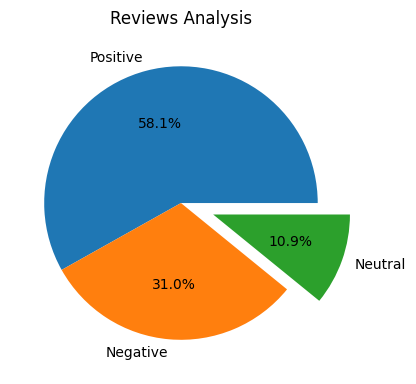

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [32]:
df.to_csv("BA_reviews.csv")


## Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

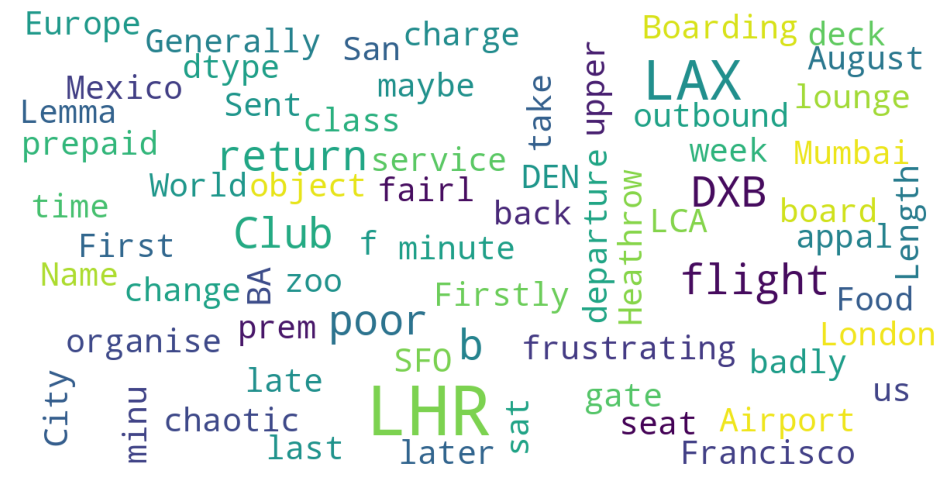

In [33]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

Performing Statistical analysis

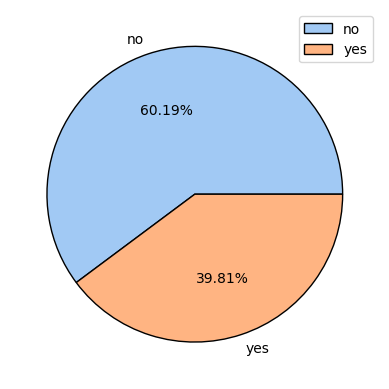

In [40]:
import seaborn as sns

soc = df.groupby('Recommended')['Cleaned Reviews'].count().reset_index()
plt.pie(soc['Cleaned Reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [41]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Sentiment
count,1767.000000,1757.000000,1564.00000,1183.000000,1664.000000,374.000000,1866.000000,1866.000000
mean,2.121109,2.453045,1.81266,2.035503,2.132212,1.454545,1.723473,0.025293
std,1.084766,1.290269,0.99136,1.132697,1.213998,0.903860,0.903170,0.706265
min,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,-0.992500
25%,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,-0.708900
50%,2.000000,2.000000,1.00000,2.000000,2.000000,1.000000,1.000000,0.064900
75%,3.000000,3.000000,2.00000,3.000000,3.000000,1.000000,2.000000,0.757900
max,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,0.997100


In [43]:
data = df_soc[df_soc['Cleaned Reviews'].str.contains('food | drink')]
data['Cleaned Reviews'].to_csv('test.csv')

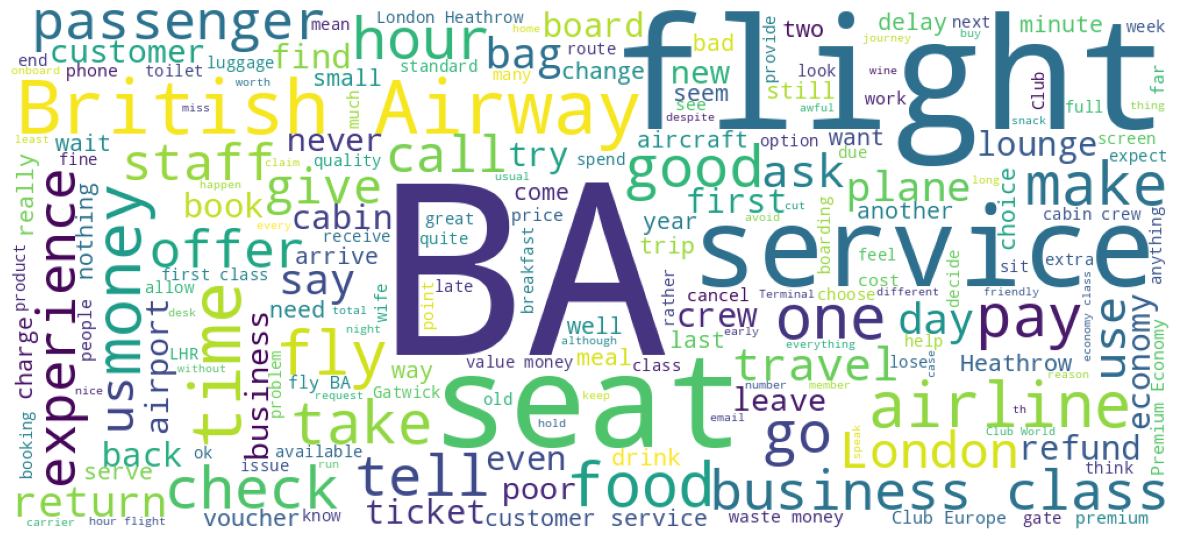

In [47]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [48]:
data = df_soc[df_soc['Lemma'].str.contains('money | refund & value')]
data['Lemma'].to_csv('test2.csv')

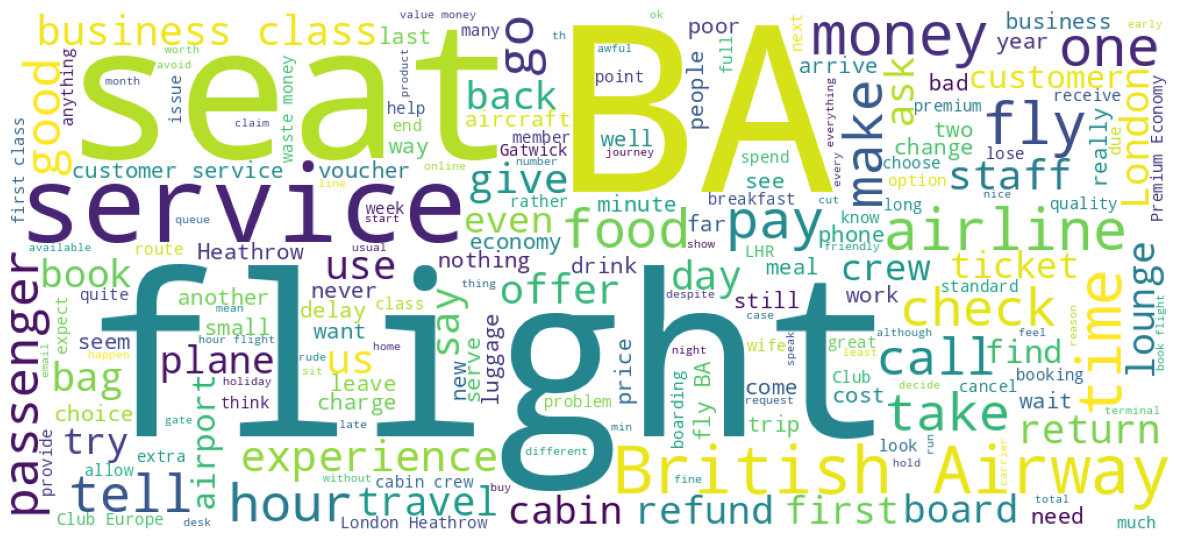

In [49]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [50]:
df_2 = df[df['Analysis'] == 'Negative']
df_2.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Sentiment
count,905.000000,898.000000,788.000000,601.000000,857.000000,223.000000,961.000000,961.000000
mean,2.026519,2.376392,1.798223,1.996672,1.946324,1.412556,1.677419,-0.637464
std,1.105779,1.286574,1.048335,1.116537,1.197511,0.905551,0.981071,0.269641
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.992500
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.866500
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,-0.709600
75%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,-0.444200
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-0.025800


In [53]:
data = df_2[df_2['Lemma'].str.contains('money | refund & value')]
data['Lemma'].to_csv('test3.csv')

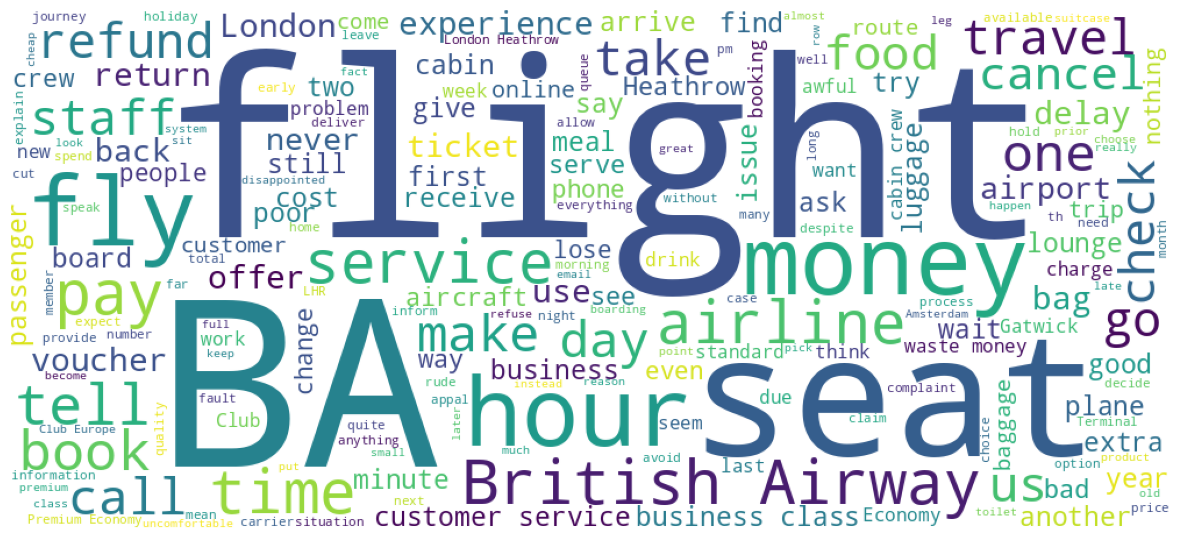

In [54]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [57]:
data = df_2[df_2['Lemma'].str.contains('food | drink')]
data['Lemma'].to_csv('test4.csv')

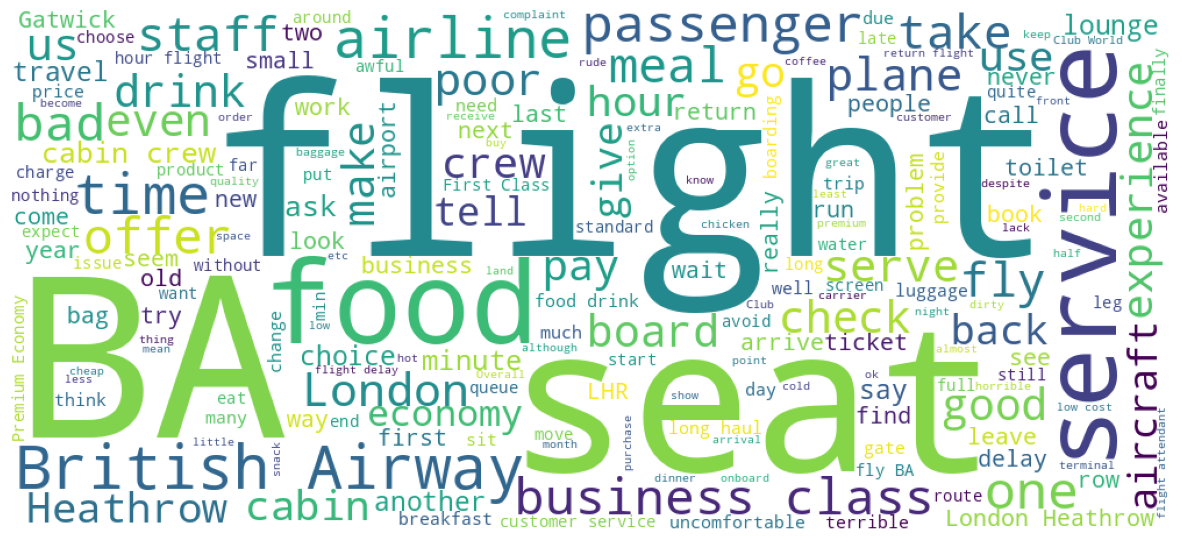

In [58]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()